In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [355]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [356]:
train.head()

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
1,2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
2,3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
3,4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
4,5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1


In [357]:
#no컬럼 드랍
train.drop('no',axis=1,inplace=True)

In [358]:
train.shape

(29305, 15)

In [359]:
test.shape

(19537, 15)

In [360]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29305 non-null  int64 
 1   workclass       29305 non-null  object
 2   fnlwgt          29305 non-null  int64 
 3   education       29305 non-null  object
 4   education-num   29305 non-null  int64 
 5   marital-status  29305 non-null  object
 6   occupation      29305 non-null  object
 7   relationship    29305 non-null  object
 8   race            29305 non-null  object
 9   sex             29305 non-null  object
 10  capital-gain    29305 non-null  int64 
 11  capital-loss    29305 non-null  int64 
 12  hours-per-week  29305 non-null  int64 
 13  native-country  29305 non-null  object
 14  income          29305 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.4+ MB


In [361]:
train['race'].unique()

array([' White', ' Asian-Pac-Islander', ' Black', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [362]:
test.drop('no',axis=1,inplace=True)

In [363]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29305 non-null  int64 
 1   workclass       29305 non-null  object
 2   fnlwgt          29305 non-null  int64 
 3   education       29305 non-null  object
 4   education-num   29305 non-null  int64 
 5   marital-status  29305 non-null  object
 6   occupation      29305 non-null  object
 7   relationship    29305 non-null  object
 8   race            29305 non-null  object
 9   sex             29305 non-null  object
 10  capital-gain    29305 non-null  int64 
 11  capital-loss    29305 non-null  int64 
 12  hours-per-week  29305 non-null  int64 
 13  native-country  29305 non-null  object
 14  income          29305 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.4+ MB


In [364]:
train.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.075753,0.035084,0.078498,0.054413,0.073100,0.238460
fnlwgt,-0.075753,1.000000,-0.030600,-0.005051,-0.001513,-0.010154,-0.002994
education-num,0.035084,-0.030600,1.000000,0.127651,0.083925,0.147569,0.331798
capital-gain,0.078498,-0.005051,0.127651,1.000000,-0.031401,0.088609,0.221387
capital-loss,0.054413,-0.001513,0.083925,-0.031401,1.000000,0.055271,0.135645
hours-per-week,0.073100,-0.010154,0.147569,0.088609,0.055271,1.000000,0.231045
income,0.238460,-0.002994,0.331798,0.221387,0.135645,0.231045,1.000000


In [365]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19537 entries, 0 to 19536
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             19537 non-null  int64 
 1   workclass       19537 non-null  object
 2   fnlwgt          19537 non-null  int64 
 3   education       19537 non-null  object
 4   education-num   19537 non-null  int64 
 5   marital-status  19537 non-null  object
 6   occupation      19537 non-null  object
 7   relationship    19537 non-null  object
 8   race            19537 non-null  object
 9   sex             19537 non-null  object
 10  capital-gain    19537 non-null  int64 
 11  capital-loss    19537 non-null  int64 
 12  hours-per-week  19537 non-null  int64 
 13  native-country  19537 non-null  object
dtypes: int64(6), object(8)
memory usage: 2.1+ MB


In [366]:
train[train['workclass']==' ?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
19,18,?,220168,Some-college,10,Never-married,?,Own-child,White,Male,0,0,16,United-States,0
20,23,?,194096,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0
24,19,?,50626,Some-college,10,Never-married,?,Own-child,Black,Female,0,0,20,United-States,0
37,24,?,152719,Some-college,10,Never-married,?,Own-child,Black,Female,0,0,15,Haiti,0
47,23,?,62507,Some-college,10,Never-married,?,Not-in-family,White,Female,0,0,12,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29244,28,?,196630,Assoc-voc,11,Separated,?,Unmarried,White,Female,0,0,40,Mexico,0
29247,50,?,23780,Masters,14,Married-spouse-absent,?,Other-relative,White,Male,0,0,40,United-States,0
29280,22,?,110622,Bachelors,13,Never-married,?,Own-child,Asian-Pac-Islander,Female,0,0,15,Taiwan,0
29286,21,?,143995,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,20,United-States,0


In [367]:
train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [368]:
test.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [369]:
pt1=train.pivot_table(values='age',
                 index=['education-num','sex'],
                 aggfunc='mean')

In [370]:
pt1

age
education-num sex               
1              Female  47.916667
               Male    43.588235
2              Female  48.904762
               Male    45.245283
3              Female  45.556818
               Male    42.341463
4              Female  50.506849
               Male    49.317757
5              Female  42.790698
               Male    40.289037
6              Female  36.358885
               Male    37.852552
7              Female  29.658667
               Male    33.714076
8              Female  28.523077
               Male    33.035088
9              Female  38.908822
               Male    39.004533
10             Female  33.703454
               Male    37.093092
11             Female  38.004577
               Male    39.414880
12             Female  37.122016
               Male    38.718076
13             Female  35.874064
               Male    40.230838
14             Female  42.989712
               Male    44.882834
15             Female  40.397590
               Male    46.362110
16             Female  45.651515
               Male    47.903915

In [371]:
train['workclass'].value_counts()

 Private             20410
 Self-emp-not-inc     2305
 Local-gov            1868
 ?                    1663
 State-gov            1201
 Self-emp-inc          987
 Federal-gov           854
 Without-pay            12
 Never-worked            5
Name: workclass, dtype: int64

In [372]:
train = train.replace({"workclass" : " ?"}," Private")
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
1,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
2,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
3,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
4,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29301,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29302,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0
29303,33,Private,157446,11th,7,Never-married,Craft-repair,Not-in-family,White,Male,0,0,65,United-States,0


In [373]:
train[train['workclass']==' private']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [374]:
### ?인 값 변경

In [375]:
train['occupation'].value_counts()

 Prof-specialty       3724
 Craft-repair         3632
 Exec-managerial      3609
 Adm-clerical         3440
 Sales                3292
 Other-service        2975
 Machine-op-inspct    1811
 ?                    1668
 Transport-moving     1393
 Handlers-cleaners    1249
 Farming-fishing       888
 Tech-support          865
 Protective-serv       603
 Priv-house-serv       146
 Armed-Forces           10
Name: occupation, dtype: int64

In [376]:
train = train.replace({"occupation" : " ?"}," Prof-specialty")
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
1,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
2,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
3,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
4,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29301,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29302,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0
29303,33,Private,157446,11th,7,Never-married,Craft-repair,Not-in-family,White,Male,0,0,65,United-States,0


In [377]:
train[train['occupation']==' ?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [378]:
train = train.replace({"native-country" : " ?"}," Uniter-States")
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
1,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
2,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
3,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
4,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29301,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29302,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0
29303,33,Private,157446,11th,7,Never-married,Craft-repair,Not-in-family,White,Male,0,0,65,United-States,0


In [379]:
train[train['native-country']==' ?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [380]:
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
1,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
2,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
3,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
4,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29301,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29302,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0
29303,33,Private,157446,11th,7,Never-married,Craft-repair,Not-in-family,White,Male,0,0,65,United-States,0


In [381]:
train['native-country'].unique()

array([' United-States', ' Haiti', ' Mexico', ' Puerto-Rico',
       ' Philippines', ' Uniter-States', ' Germany', ' Peru', ' Ecuador',
       ' Iran', ' Thailand', ' Dominican-Republic', ' Poland',
       ' Scotland', ' Italy', ' Jamaica', ' China', ' Portugal',
       ' Columbia', ' Hungary', ' Vietnam', ' Taiwan', ' Canada', ' Hong',
       ' Guatemala', ' El-Salvador', ' England',
       ' Outlying-US(Guam-USVI-etc)', ' India', ' France', ' Cuba',
       ' Greece', ' Trinadad&Tobago', ' South', ' Japan', ' Yugoslavia',
       ' Nicaragua', ' Ireland', ' Cambodia', ' Laos', ' Honduras',
       ' Holand-Netherlands'], dtype=object)

In [382]:
import seaborn as sns

<AxesSubplot:xlabel='workclass', ylabel='count'>

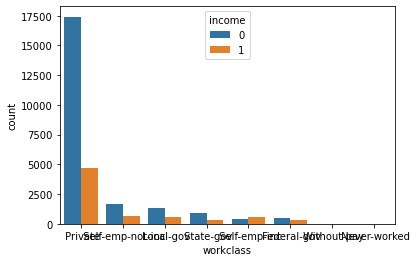

In [383]:
sns.countplot(data=train,
             x='workclass',
             hue='income')

<AxesSubplot:xlabel='age', ylabel='count'>

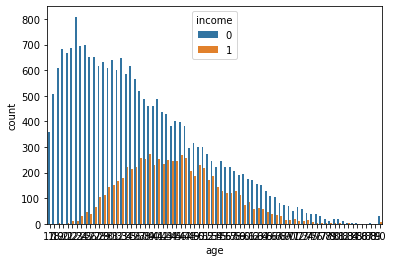

In [384]:
sns.countplot(data=train,
             x='age',
             hue='income')

<AxesSubplot:xlabel='education-num', ylabel='count'>

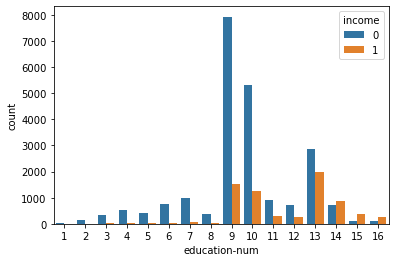

In [385]:
sns.countplot(data=train,
             x='education-num',
             hue='income')

<AxesSubplot:xlabel='occupation', ylabel='count'>

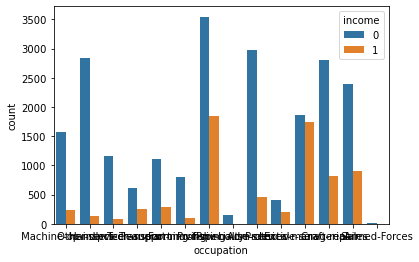

In [386]:
sns.countplot(data=train,
             x='occupation',
             hue='income')

<AxesSubplot:xlabel='fnlwgt', ylabel='count'>

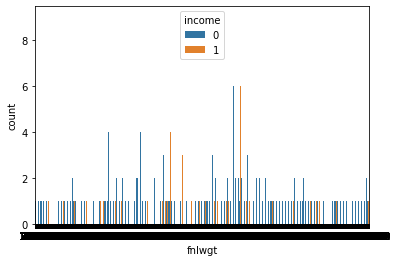

In [387]:
sns.countplot(data=train,
             x='fnlwgt',
             hue='income') #불필요

<AxesSubplot:xlabel='marital-status', ylabel='count'>

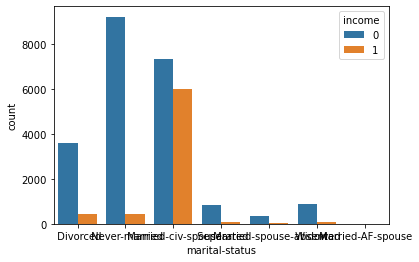

In [388]:
sns.countplot(data=train,
             x='marital-status',
             hue='income')

<AxesSubplot:xlabel='relationship', ylabel='count'>

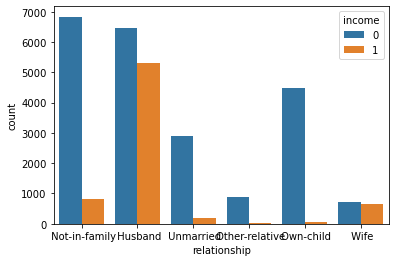

In [389]:
sns.countplot(data=train,
             x='relationship',
             hue='income')

<AxesSubplot:xlabel='race', ylabel='count'>

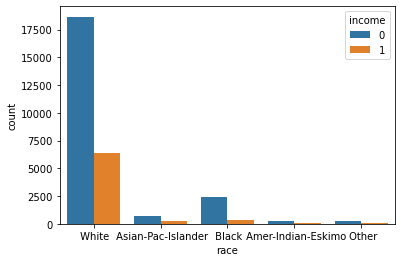

In [390]:
sns.countplot(data=train,
             x='race',
             hue='income')  #불필요 

<AxesSubplot:xlabel='sex', ylabel='count'>

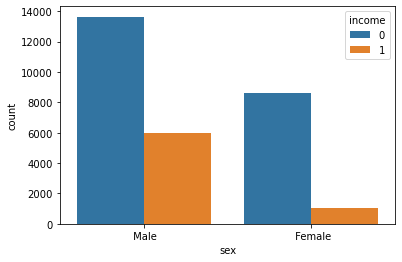

In [391]:
sns.countplot(data=train,
             x='sex',
             hue='income')

<AxesSubplot:xlabel='capital-gain', ylabel='count'>

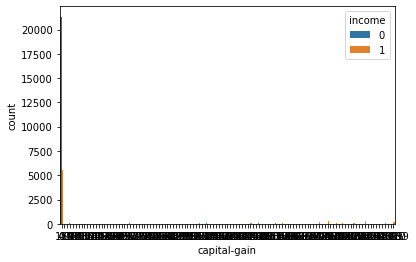

In [392]:
sns.countplot(data=train,
             x='capital-gain', #불필요
             hue='income')

<AxesSubplot:xlabel='capital-loss', ylabel='count'>

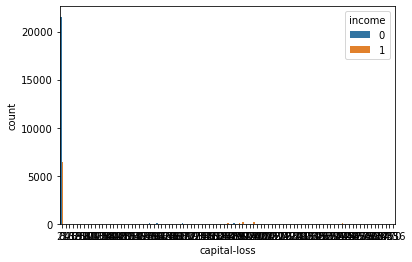

In [393]:
sns.countplot(data=train,
             x='capital-loss', #불필요
             hue='income')

<AxesSubplot:xlabel='hours-per-week', ylabel='count'>

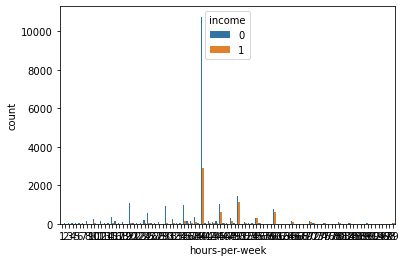

In [394]:
sns.countplot(data=train,
             x='hours-per-week', #불필요
             hue='income')

<AxesSubplot:xlabel='native-country', ylabel='count'>

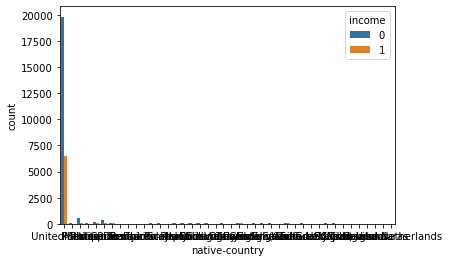

In [395]:
sns.countplot(data=train,
             x='native-country', #미정
             hue='income')

In [396]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
1,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
2,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
3,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
4,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1


In [397]:
#필요없는 컬럼 드랍후-원핫인코딩후 컬럼 병합후 이어가기
# native-country안지우고 체크1

In [398]:
train.drop(['fnlwgt','race','capital-gain','capital-loss','hours-per-week'],axis=1,inplace=True)

In [399]:
train.head(1)

,age,workclass,education,education-num,marital-status,occupation,relationship,sex,native-country,income
0,25,Private,11th,7,Divorced,Machine-op-inspct,Not-in-family,Male,United-States,0


In [400]:
test.drop(['fnlwgt','race','capital-gain','capital-loss','hours-per-week'],axis=1,inplace=True)

In [401]:
test.head(1)

,age,workclass,education,education-num,marital-status,occupation,relationship,sex,native-country
0,18,?,Some-college,10,Never-married,?,Own-child,Male,United-States


In [402]:
#?값 테스트에도 변경
test = test.replace({"workclass" : " ?"}," Private")
test

,age,workclass,education,education-num,marital-status,occupation,relationship,sex,native-country
0,18,Private,Some-college,10,Never-married,?,Own-child,Male,United-States
1,29,Private,HS-grad,9,Married-civ-spouse,Other-service,Wife,Female,United-States
2,45,Private,Bachelors,13,Married-civ-spouse,Tech-support,Husband,Male,United-States
3,42,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,United-States
4,41,Private,Doctorate,16,Married-civ-spouse,Exec-managerial,Wife,Female,United-States
...,...,...,...,...,...,...,...,...,...
19532,45,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,United-States
19533,48,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,Female,United-States
19534,63,Private,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,Male,United-States
19535,18,Private,11th,7,Never-married,Sales,Own-child,Female,United-States


In [403]:
test = test.replace({"occupation" : " ?"}," Prof-specialty")
test

,age,workclass,education,education-num,marital-status,occupation,relationship,sex,native-country
0,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,Male,United-States
1,29,Private,HS-grad,9,Married-civ-spouse,Other-service,Wife,Female,United-States
2,45,Private,Bachelors,13,Married-civ-spouse,Tech-support,Husband,Male,United-States
3,42,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,United-States
4,41,Private,Doctorate,16,Married-civ-spouse,Exec-managerial,Wife,Female,United-States
...,...,...,...,...,...,...,...,...,...
19532,45,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,United-States
19533,48,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,Female,United-States
19534,63,Private,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,Male,United-States
19535,18,Private,11th,7,Never-married,Sales,Own-child,Female,United-States


In [404]:
test = test.replace({"native-country" : " ?"}," Uniter-States")
test

,age,workclass,education,education-num,marital-status,occupation,relationship,sex,native-country
0,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,Male,United-States
1,29,Private,HS-grad,9,Married-civ-spouse,Other-service,Wife,Female,United-States
2,45,Private,Bachelors,13,Married-civ-spouse,Tech-support,Husband,Male,United-States
3,42,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,United-States
4,41,Private,Doctorate,16,Married-civ-spouse,Exec-managerial,Wife,Female,United-States
...,...,...,...,...,...,...,...,...,...
19532,45,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,United-States
19533,48,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,Female,United-States
19534,63,Private,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,Male,United-States
19535,18,Private,11th,7,Never-married,Sales,Own-child,Female,United-States


In [405]:
# 원핫인코딩후 컬럼 병합후 이어가기

In [406]:
train.head(5)

,age,workclass,education,education-num,marital-status,occupation,relationship,sex,native-country,income
0,25,Private,11th,7,Divorced,Machine-op-inspct,Not-in-family,Male,United-States,0
1,39,Private,Some-college,10,Divorced,Other-service,Not-in-family,Female,United-States,0
2,35,Private,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Female,Haiti,0
3,64,Private,Assoc-voc,11,Divorced,Tech-support,Not-in-family,Female,United-States,0
4,24,Private,Some-college,10,Married-civ-spouse,Transport-moving,Husband,Male,United-States,1


In [407]:
categorical_features=['workclass','education','marital-status','occupation','relationship','sex','native-country']

In [408]:
train['workclass'].unique()

array([' Private', ' Self-emp-not-inc', ' Local-gov', ' State-gov',
       ' Self-emp-inc', ' Federal-gov', ' Without-pay', ' Never-worked'],
      dtype=object)

In [409]:
test['workclass'].unique()

array([' Private', ' Self-emp-not-inc', ' Local-gov', ' Self-emp-inc',
       ' State-gov', ' Federal-gov', ' Without-pay', ' Never-worked'],
      dtype=object)

In [410]:
for feature_name in categorical_features:
    # 원-핫 인코딩
    one_hot=pd.get_dummies(train[feature_name],prefix=feature_name)
    # 기존 문자 형태 컬럼 삭제
    train.drop(feature_name,axis=1,inplace=True)
    # 기존 train 데이터에 원-핫 데이터 병합하기 (기존데이터 삭제 후)
    train = pd.concat([train,one_hot], axis=1)


In [411]:
train.head(2)

,age,education-num,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Uniter-States,native-country_ Vietnam,native-country_ Yugoslavia
0,25,7,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,39,10,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [412]:
for features_name in categorical_features:
    # 원-핫 인코딩
    one_hot = pd.get_dummies(test[features_name], prefix=features_name)
    # 기존 문자 형태 컬럼 삭제
    test.drop(features_name, axis=1,inplace = True)
    # 기존 train 데이터에 원-핫 데이터 병합하기 (기존데이터 삭제 후)
    test = pd.concat([test,one_hot], axis = 1)

In [413]:
train.columns

Index(['age', 'education-num', 'income', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'marital-status_ Divorced',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces',

In [414]:
test.columns

Index(['age', 'education-num', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'marital-status_ Divorced',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupati

In [415]:
set(test.columns)-set(train.columns)

set()

In [416]:
set(train.columns)-set(test.columns)

{'income', 'native-country_ Holand-Netherlands'}

In [417]:
test['native-country_ Holand-Netherlands']=0

In [418]:
test['native-country_ Holand-Netherlands']

0        0
1        0
2        0
3        0
4        0
        ..
19532    0
19533    0
19534    0
19535    0
19536    0
Name: native-country_ Holand-Netherlands, Length: 19537, dtype: int64

In [419]:
train.columns

Index(['age', 'education-num', 'income', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'marital-status_ Divorced',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces',

In [420]:
test.columns

Index(['age', 'education-num', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'marital-status_ Divorced',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spouse-absent',
       'marital-status_ Never-married', 'marital-status_ Separated',
       'marital-status_ Widowed', 'occupation_ Adm-clerical',
       'occupation_ Armed-Forces', 'occupati

In [421]:
set(train.columns)-set(test.columns)

{'income'}

In [422]:
test.head(1)

,age,education-num,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Uniter-States,native-country_ Vietnam,native-country_ Yugoslavia,native-country_ Holand-Netherlands
0,18,10,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [423]:
X_train=train.drop('income',axis=1)
y_train=train['income']


In [424]:
X_test=test[X_train.columns]

In [425]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [426]:
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()

In [427]:
from sklearn.model_selection import train_test_split

In [428]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train)

In [429]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((21978, 97), (7327, 97), (21978,), (7327,))

In [430]:
knn_model.fit(X_train,y_train)
tree_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [431]:
knn_model.score(X_val,y_val)

0.8146581138255766

In [432]:
tree_model.score(X_val,y_val)

0.7868158864473864

In [433]:
from sklearn.model_selection import cross_val_score

In [434]:
knn_result=cross_val_score(knn_model,X_train,y_train,cv=5)
knn_result

array([0.80345769, 0.8177889 , 0.80709736, 0.80136519, 0.79749716])

In [435]:
knn_result.mean()

0.8054412585233652

In [436]:
tree_result=cross_val_score(tree_model,X_train,y_train,cv=5)

In [437]:
tree_result.mean()

0.7855123439345522

In [453]:
score_list=[]
for k in range(1,150):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_result= cross_val_score(knn_model,X_train,y_train,cv=5)
    score_list.append(knn_result.mean())

In [454]:
score_list3=[]
for d in range(1,150):
    tree_model = DecisionTreeClassifier(max_depth=d)
    tree_result= cross_val_score(tree_model,X_train,y_train,cv=5)
    score_list3.append(tree_result.mean())

In [455]:
final_tree=DecisionTreeClassifier(max_depth=3)
final_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [456]:
cross_val_score(final_tree,X_train,y_train,cv=5).mean()

0.81713486559816

In [457]:
final_tree2=KNeighborsClassifier(n_neighbors=3)
final_tree2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [458]:
cross_val_score(final_tree2,X_train,y_train,cv=5).mean()

0.8023016580384897

In [459]:
pre=final_tree.predict(X_test)

In [460]:
submission=pd.read_csv('sample_submission.csv')

In [461]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [462]:
gb_model = GradientBoostingClassifier(n_estimators=1000,
                                     max_depth=6,
                                     learning_rate=0.01)

In [463]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=6, n_estimators=1000)

In [464]:
gb_result = cross_val_score(gb_model,X_train,y_train,cv=5)
gb_result.mean()

0.8344700581043268

In [450]:
submission

,no,income
0,29306,0
1,29307,0
2,29308,0
3,29309,0
4,29310,0
...,...,...
19532,48838,1
19533,48839,0
19534,48840,1
19535,48841,0


In [451]:
submission["income"] = pre

In [452]:
submission.to_csv("submission_su1.csv",index=False)